In [2]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import Counter

In [96]:
class KNearestNeighbour:
    def __init__(self, k, p=2):
        self.k = k
        self.p = p
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def _dist(self, X, y):
        return np.sum(np.abs(X - y) ** self.p) ** (1 / self.p)

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            heap = []
            for idx in range(len(self.X)):
                heapq.heappush(heap, (-self._dist(self.X[idx], X[i]), self.y[idx][0]))
                if len(heap) > self.k:
                    heapq.heappop(heap)
            k_nearest_labels = [elm[1] for elm in heap]
            most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)
        return predictions

In [97]:
with open('00 Data.npy', 'rb') as f:
    X_1 = np.load(f)
    y_1 = np.load(f)
    X_2 = np.load(f)
    y_2 = np.load(f)
    X = np.load(f)
    y = np.load(f)

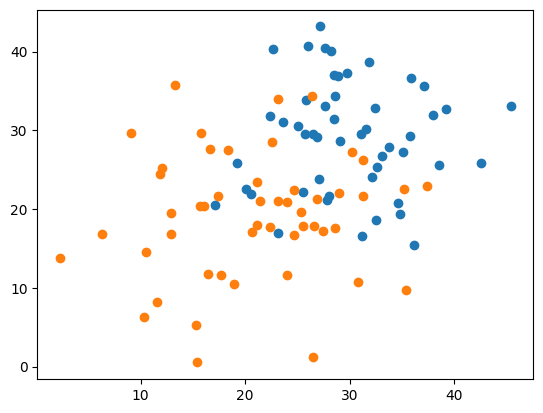

In [98]:
plt.plot(X_1, y_1, 'o')
plt.plot(X_2, y_2, 'o')

In [99]:
model = KNearestNeighbour(1)

In [100]:
model.fit(X, y)

In [101]:
predicted_orange, predicted_blue = [[], []], [[], []]

for i in range(50):
    for j in range(50):
        if model.predict([[i, j]])[0] < 0.5:
            predicted_blue[0] += [i]
            predicted_blue[1] += [j]
        else:
            predicted_orange[0] += [i]
            predicted_orange[1] += [j]

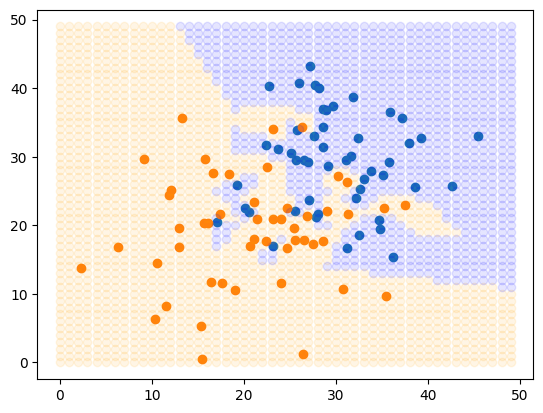

In [102]:
plt.plot(X_1, y_1, 'o')
plt.plot(X_2, y_2, 'o')
plt.plot(predicted_orange[0], predicted_orange[1], 'o', alpha=0.1, color='orange')
plt.plot(predicted_blue[0], predicted_blue[1], 'o', alpha=0.1, color='blue')

In [103]:
model = KNearestNeighbour(15)

In [104]:
model.fit(X, y)

In [105]:
predicted_orange, predicted_blue = [[], []], [[], []]

for i in range(50):
    for j in range(50):
        if model.predict([[i, j]])[0] < 0.5:
            predicted_blue[0] += [i]
            predicted_blue[1] += [j]
        else:
            predicted_orange[0] += [i]
            predicted_orange[1] += [j]

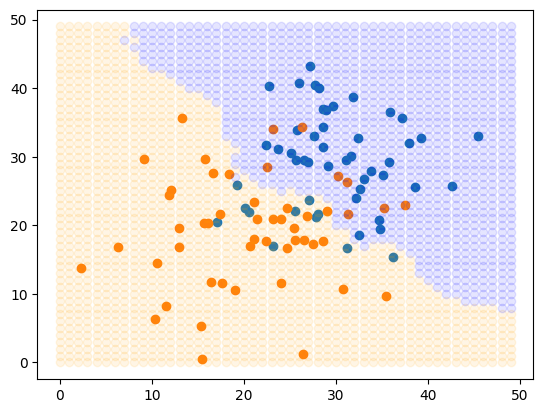

In [106]:
plt.plot(X_1, y_1, 'o')
plt.plot(X_2, y_2, 'o')
plt.plot(predicted_orange[0], predicted_orange[1], 'o', alpha=0.1, color='orange')
plt.plot(predicted_blue[0], predicted_blue[1], 'o', alpha=0.1, color='blue')

In [111]:
import numpy as np

# Definisikan data
X = np.array([[1], [2], [3]])
Y = np.array([1, 2, 3])

# Tambahkan kolom bias
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Hitung E(XX^T)
XXT = np.dot(X.T, X)
E_XXT = XXT / len(X)

# Hitung E(XY)
XY = np.dot(X.T, Y)
E_XY = XY / len(X)

# Hitung beta
beta = np.dot(np.linalg.inv(E_XXT), E_XY)

beta


array([0., 1.])